In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')


from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **TRIMMING**

In [ ]:
!pip install ffmpeg-python


In [ ]:
!apt install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [ ]:
import os
import ffmpeg

def convert_opus_to_ogg(input_file, output_file):
    try:
        # Convert opus to ogg
        stream = ffmpeg.input(input_file)
        stream = ffmpeg.output(stream, output_file)
        ffmpeg.run(stream, overwrite_output=True)

        print(f"Conversion successful: {output_file}")

    except ffmpeg.Error as e:
        print(f"Error occurred: {e.stderr}")
        return False

# Path to the "balaji" folder containing day_1 to day_7 subfolders
input_folder = '/content/drive/MyDrive/balaji'

# New location to save the converted files
output_folder = '/content/drive/MyDrive/converted'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Walk through each subfolder in the "balaji" folder
for root, dirs, files in os.walk(input_folder):
    for file in files:
        if file.endswith('.opus'):
            # Get the day folder name (e.g., day_1, day_2, ..., day_7)
            day_folder = os.path.basename(root)

            # Construct the output day folder path
            output_day_folder = os.path.join(output_folder, day_folder)

            # Create the output day folder if it doesn't exist
            os.makedirs(output_day_folder, exist_ok=True)

            # Construct the input and output paths
            input_path = os.path.join(root, file)
            output_path = os.path.join(output_day_folder, file.replace('.opus', '.ogg'))

            # Convert opus to ogg and save to the output folder
            convert_opus_to_ogg(input_path, output_path)


Conversion successful: /content/drive/MyDrive/converted/day_1/julian.mon.ogg
Conversion successful: /content/drive/MyDrive/converted/day_1/mon.ogg.ogg
Conversion successful: /content/drive/MyDrive/converted/day_2/julian.tue.ogg
Conversion successful: /content/drive/MyDrive/converted/day_2/tuesday.ogg.ogg
Conversion successful: /content/drive/MyDrive/converted/day_3/julian.wed.ogg
Conversion successful: /content/drive/MyDrive/converted/day_3/wed.ogg.ogg
Conversion successful: /content/drive/MyDrive/converted/day_4/thur.ogg.ogg
Conversion successful: /content/drive/MyDrive/converted/day_4/julian.thur.ogg
Conversion successful: /content/drive/MyDrive/converted/day_5/julian.fri.ogg
Conversion successful: /content/drive/MyDrive/converted/day_5/fri.ogg.ogg
Conversion successful: /content/drive/MyDrive/converted/day_6/julian.satur.ogg
Conversion successful: /content/drive/MyDrive/converted/day_6/sat.ogg.ogg
Conversion successful: /content/drive/MyDrive/converted/day_7/julian.sun.ogg
Conversio

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
from tqdm import tqdm

# Function to trim audio to a specified percentage from both start and end
def trim_audio(audio, percentage_start, percentage_end):
    trimmed_audio_start = trim_percentage_of_max_amplitude(audio, percentage_start)
    trimmed_audio_end = trim_percentage_from_end(trimmed_audio_start, percentage_end)
    return trimmed_audio_end

# Define trimming functions
def trim_percentage_of_max_amplitude(audio, percentage=10):
    max_amplitude = np.max(np.abs(audio))
    threshold = percentage / 100.0 * max_amplitude

    # Find the indices where the amplitude is above the threshold
    above_threshold_indices = np.where(np.abs(audio) >= threshold)[0]

    if len(above_threshold_indices) == 0:
        # No samples above the threshold, return an array of zeros
        return np.zeros_like(audio)

    # Find the index of the first sample above the threshold
    first_above_threshold_index = above_threshold_indices[0]

    # Trim the audio until the first instance above the threshold
    trimmed_audio = audio[first_above_threshold_index:]

    return trimmed_audio

def trim_percentage_from_end(audio, percentage=10):
    # Reverse the audio and trim based on the specified percentage
    reversed_audio = np.flip(audio)
    trimmed_audio_reversed = trim_percentage_of_max_amplitude(reversed_audio, percentage)

    # Reverse back to get the correct order
    trimmed_audio = np.flip(trimmed_audio_reversed)

    return trimmed_audio

# Define paths
data_dir = "/content/drive/MyDrive/converted"
output_dir = "/content/drive/MyDrive/T1"

# Trim percentages
percentage_start = 20
percentage_end = 20

# Loop through the main directory
for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    output_category_dir = os.path.join(output_dir, category)

    # Create output directory if it doesn't exist
    os.makedirs(output_category_dir, exist_ok=True)

    # Loop through audio files
    for audio_file in tqdm(os.listdir(category_dir)):
        if audio_file.endswith('.ogg'):
            audio_path = os.path.join(category_dir, audio_file)
            output_audio_path_base = os.path.join(output_category_dir, os.path.splitext(audio_file)[0])

            try:
                # Load the audio file using librosa
                audio_data, sr = librosa.load(audio_path, sr=None)

                # Check if audio_data is a NumPy array
                if isinstance(audio_data, np.ndarray):

                    # Trim the audio based on the specified percentages
                    trimmed_audio = trim_audio(audio_data, percentage_start, percentage_end)

                    # Save the trimmed audio file
                    output_trimmed_audio_path = f'{output_audio_path_base}_trimmed.ogg'
                    sf.write(output_trimmed_audio_path, trimmed_audio, sr)
                else:
                    print(f"Skipping {audio_file}. Unable to load as NumPy array.")
            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

print("Processing complete!")

100%|██████████| 2/2 [00:00<00:00, 46.12it/s]

Processing complete!


Category: day_1


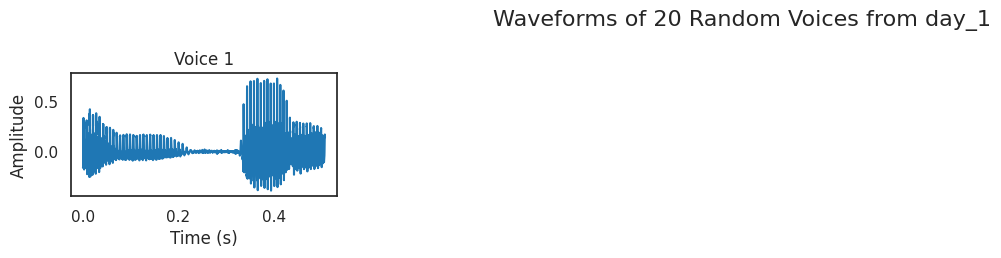

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import random

# Define paths
data_dir = "/content/drive/MyDrive/T1"
category = "day_1"

category_dir = os.path.join(data_dir, category)

# Check if the category directory exists
if not os.path.exists(category_dir) or not os.path.isdir(category_dir):
    print(f"Error: {category} directory not found.")
else:
    print(f"Category: {category}")

    audio_files = [file for file in os.listdir(category_dir) if file.endswith('.ogg')]

    # Check if there are any audio files
    if not audio_files:
        print(f"No audio files found in {category} category.")
    else:
        # Select 20 random audio files
        selected_files = random.sample(audio_files, 1)

        # Plot waveforms
        plt.figure(figsize=(15, 8))
        plt.suptitle(f'Waveforms of 20 Random Voices from {category}', fontsize=16)

        for i, audio_file in enumerate(selected_files, 1):
            audio_path = os.path.join(category_dir, audio_file)
            audio_data, sr = librosa.load(audio_path, sr=None)

            plt.subplot(4, 5, i)
            plt.plot(np.arange(len(audio_data)) / sr, audio_data)
            plt.title(f'Voice {i}')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')

            # Display the audio playback widget
            display(Audio(data=audio_data, rate=sr))

        plt.tight_layout()
        plt.show()


# Preprocessing

In [ ]:
pip install tqdm

In [ ]:
pip install librosa soundfile

### Amplitude NOrmalisation

In [ ]:
import os
import soundfile as sf
import numpy as np
from tqdm import tqdm

# Define paths
Trimmed_dir = "/content/drive/MyDrive/T1"
normalized_dir = "/content/drive/MyDrive/n"

try:
    # Create the new directory for normalized files
    os.makedirs(normalized_dir, exist_ok=True)

    # Iterate through the trimmed audio files
    for category in os.listdir(Trimmed_dir):
        category_dir = os.path.join(Trimmed_dir, category)
        normalized_category_dir = os.path.join(normalized_dir, category)

        # Create the directory for the normalized category
        os.makedirs(normalized_category_dir, exist_ok=True)

        for Trimmed_file in tqdm(os.listdir(category_dir)):
            if Trimmed_file.endswith('.ogg'):
                Trimmed_audio_path = os.path.join(category_dir, Trimmed_file)
                normalized_audio_path = os.path.join(normalized_category_dir, Trimmed_file.replace('_stretch', '_normalized'))

                try:
                    # Load the Trimmed audio file
                    Trimmed_audio, sr_Trimmed = sf.read(Trimmed_audio_path)

                    # Normalize audio amplitudes
                    normalized_audio = Trimmed_audio / np.max(np.abs(Trimmed_audio))

                    # Save the normalized audio to the new directory
                    sf.write(normalized_audio_path, normalized_audio, sr_Trimmed)

                except Exception as e:
                    print(f"Error processing {Trimmed_audio_path}: {e}")

    print("Amplitude normalization completed, and normalized files saved!")

except Exception as e:
    print(f"An error occurred: {e}")


100%|██████████| 2/2 [00:00<00:00, 56.60it/s]

Amplitude normalization completed, and normalized files saved!


### Spectral reduction on Normalised data

In [ ]:
import os
import soundfile as sf
import numpy as np
from tqdm import tqdm
from scipy.fft import fft, ifft

# Define paths
normalized_dir = "/content/drive/MyDrive/n"
spectral_reduced_dir = "/content/drive/MyDrive/s"

try:
    # Create the new directory for spectral reduced files
    os.makedirs(spectral_reduced_dir, exist_ok=True)

    # Parameters for spectral reduction
    reduction_factor = 0.5  # Adjust this value based on your needs

    # Iterate through the normalized audio files
    for category in os.listdir(normalized_dir):
        category_dir = os.path.join(normalized_dir, category)
        spectral_reduced_category_dir = os.path.join(spectral_reduced_dir, category)

        # Create the directory for the spectral reduced category
        os.makedirs(spectral_reduced_category_dir, exist_ok=True)

        for normalized_file in tqdm(os.listdir(category_dir)):
            if normalized_file.endswith('.ogg'):
                normalized_audio_path = os.path.join(category_dir, normalized_file)
                spectral_reduced_audio_path = os.path.join(spectral_reduced_category_dir, normalized_file.replace('_normalized', '_spectral_reduced'))

                try:
                    # Load the normalized audio file
                    normalized_audio, sr_normalized = sf.read(normalized_audio_path)

                    # Apply FFT
                    spectrum = fft(normalized_audio)

                    # Reduce the spectrum (for example, by zeroing out higher frequency components)
                    reduced_spectrum = spectrum[:int(len(spectrum) * reduction_factor)]

                    # Apply Inverse FFT
                    spectral_reduced_audio = ifft(reduced_spectrum).real

                    # Save the spectral reduced audio to the new directory
                    sf.write(spectral_reduced_audio_path, spectral_reduced_audio, sr_normalized)

                except Exception as e:
                    print(f"Error processing {normalized_audio_path}: {e}")

    print("Spectral reduction completed, and spectral reduced files saved!")

except Exception as e:
    print(f"An error occurred: {e}")

100%|██████████| 2/2 [00:00<00:00, 49.47it/s]

Spectral reduction completed, and spectral reduced files saved!


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to create and save spectrogram
def save_spectrogram(audio_path, save_path, category, sr=22050, n_fft=2048, hop_length=512):
    # Load audio file
    audio, _ = librosa.load(audio_path, sr=sr)

    # Create spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # Convert to decibels
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot and save spectrogram without color bar, axis labels, and ticks
    plt.figure(figsize=(10, 6))
    plt.imshow(spectrogram_db, cmap='viridis', origin='lower', aspect='auto')

    # Turn off both x and y-axis
    plt.axis('off')

    # Remove ticks
    plt.xticks([])
    plt.yticks([])

    # Extract filename without extension
    file_name = os.path.splitext(os.path.basename(audio_path))[0]

    # Save the spectrogram image in a subfolder corresponding to the original category
    category_folder = os.path.join(save_path, category)
    os.makedirs(category_folder, exist_ok=True)

    save_file_path = os.path.join(category_folder, f'{file_name}_spectrogram.png')
    plt.savefig(save_file_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Paths
input_folder = '/content/drive/MyDrive/s'  # Replace with your audio folder
output_folder = '/content/drive/MyDrive/si'  # Replace with the desired output folder

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each audio file in the input folder and save in corresponding subfolder
for category in os.listdir(input_folder):
    category_path = os.path.join(input_folder, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            if filename.endswith('.ogg'):
                audio_path = os.path.join(category_path, filename)
                save_spectrogram(audio_path, output_folder, category)

print("Spectrograms created and saved successfully.")

Spectrograms created and saved successfully.


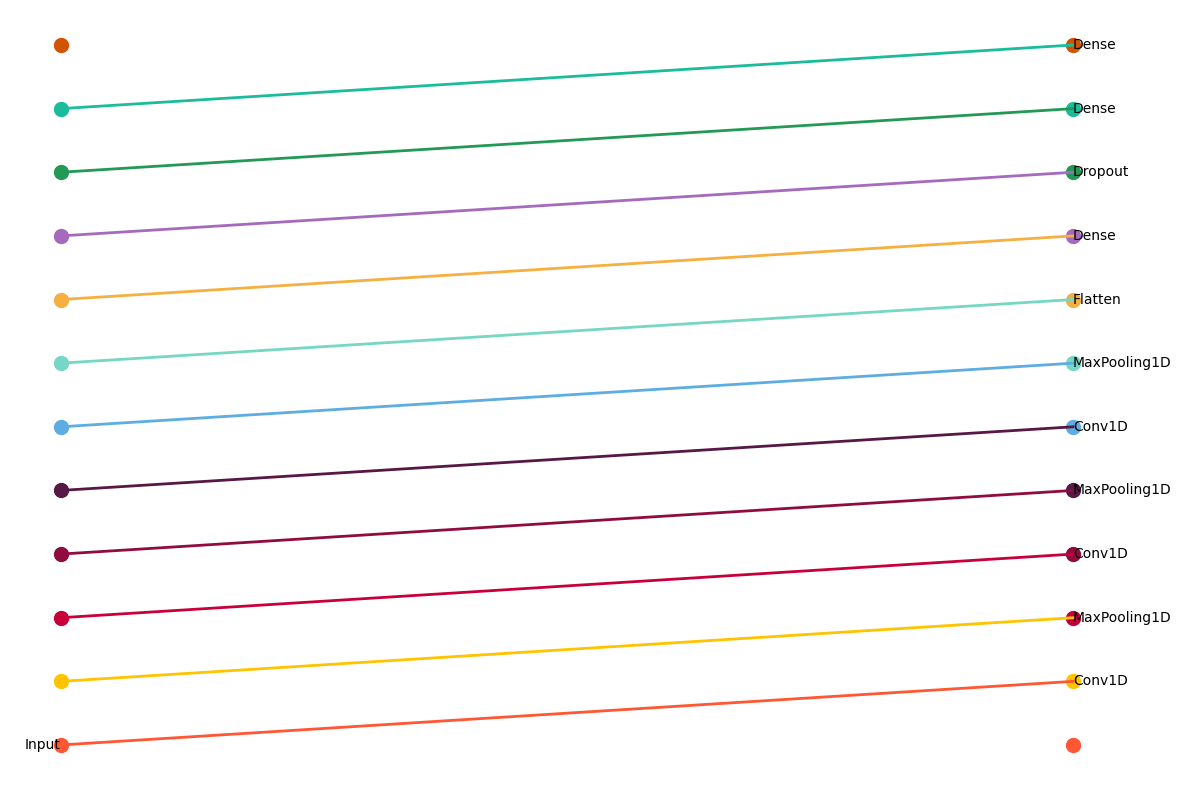

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Define the layers of your model
layers = [
    ('Input', 8),            # Input layer
    ('Conv1D', 16),          # Conv1D layer 1
    ('MaxPooling1D', None),  # MaxPooling1D layer 1
    ('Conv1D', 32),          # Conv1D layer 2
    ('MaxPooling1D', None),  # MaxPooling1D layer 2
    ('Conv1D', 64),          # Conv1D layer 3
    ('MaxPooling1D', None),  # MaxPooling1D layer 3
    ('Flatten', None),       # Flatten layer
    ('Dense', 128),          # Dense layer 1
    ('Dropout', None),       # Dropout layer
    ('Dense', 64),           # Dense layer 2
    ('Dense', 7),            # Output layer
]

# Define the colors for each layer
colors = ['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845', '#5DADE2', '#76D7C4', '#F5B041', '#A569BD', '#229954', '#1ABC9C', '#D35400']

# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the layers
for i, (layer, _) in enumerate(layers):
    if i == 0:
        ax.text(0, i, layer, ha='right', va='center')
    else:
        ax.text(1, i, layer, ha='left', va='center')
    ax.scatter([0, 1], [i, i], color=colors[i], s=100)
    if i < len(layers) - 1:
        ax.plot([0, 1], [i, i+1], color=colors[i], linestyle='-', linewidth=2)

# Remove axes
ax.axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
